## Polynomial Regression for non_linear relationship

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Creating a non linear function 
np.random.seed(23)
noise = np.random.randn(100,1)
x = 5 * np.random.rand(100,1) - 2
y = 7*x**2 + 4*x + 7 + noise

In [12]:
y.shape,x.shape, x.max(), y.max(), x.min(), y.min()

((100, 1),
 (100, 1),
 np.float64(2.9929334054686674),
 np.float64(80.73651757774647),
 np.float64(-1.8831003470620287),
 np.float64(4.705427165988505))

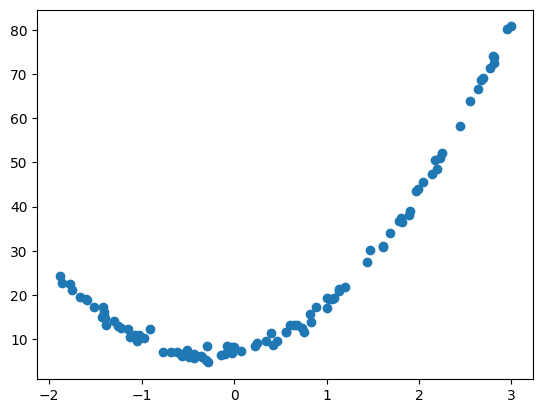

In [13]:
# Lets plot the graph to see the non linear function
plt.scatter(x,y)
plt.show()

In [14]:
# Now lets quickly split the data into training and testing part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((80, 1), (20, 1), (80, 1), (20, 1))

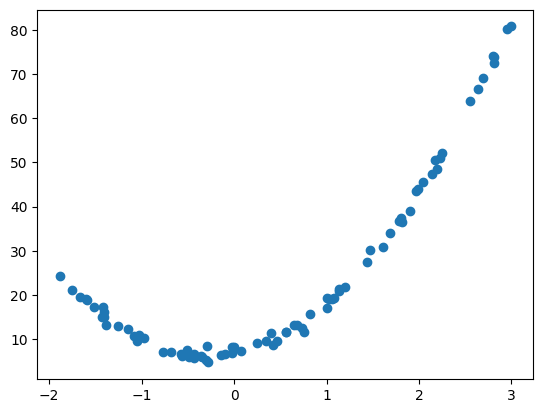

In [15]:
# Plotting the x and y training sets
plt.scatter(x_train, y_train)
plt.show()

In [16]:
# Now lets apply polynomial transformation similar to StandardScalar
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [17]:
# Importing the regressor model for polynomial transformation
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_poly_train,y_train)

LinearRegression()

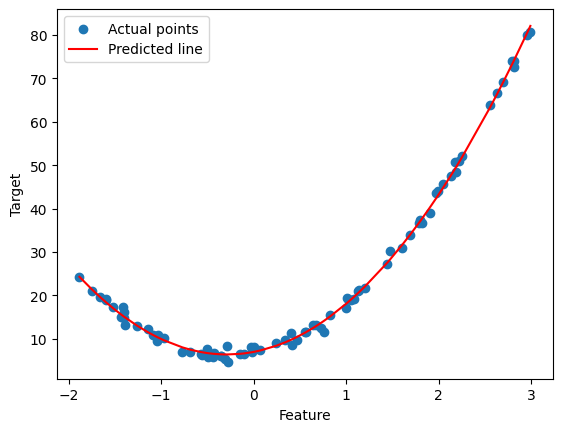

In [ ]:
# Now checking how the model is looking over the given datapoints
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
x_train_indices = np.argsort(x_train.flatten()) # This sorts the indices of x_train
# This is done to plot the line correctly
#If we don't sort the x_train, the line will not be smooth
x_sorted = x_train[x_train_indices]
x_poly_sorted = poly.transform(x_sorted)
plt.scatter(x_train, y_train, label='Actual points')
plt.plot(x_sorted, reg.predict(x_poly_sorted), c = 'red', label='Predicted line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [19]:
# Now lets predict the values with the help of model
y_pred = reg.predict(x_poly_test)
y_pred.shape

(20, 1)

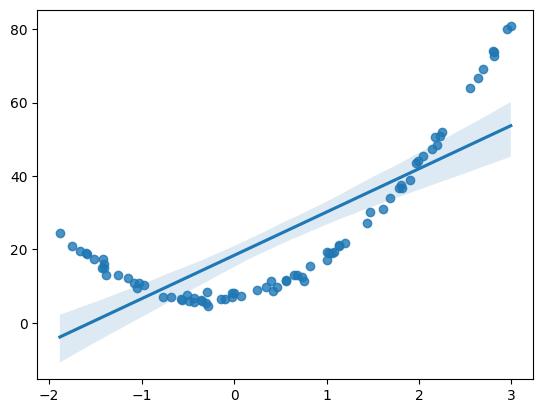

In [20]:
# we can also use regplot
import seaborn as sns
sns.regplot(x=x_train, y=y_train)
plt.show()

In [21]:
# Now lets check the metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
# Calculate predictions (assuming y_test and y_pred are already available)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manual computation
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 1.304125084909002
Mean Absolute Error (MAE): 0.8683235346393635
Root Mean Squared Error (RMSE): 1.1419829617419877
R² Score: 0.996632651294198


In [22]:
# Lets use cross-validation to see the model is not overfitting
from sklearn.model_selection import cross_val_score
validation = cross_val_score(estimator=reg, X=x_poly_train, y=y_train, cv=5, scoring='r2' )
np.mean(validation)

np.float64(0.9979827501254828)

In [23]:
# Using OLS 
import statsmodels.api as sm
ols_model = sm.OLS(y_train, x_poly_train).fit()
ols_y_pred = ols_model.predict(x_poly_test)
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.052e+04
Date:                Fri, 27 Jun 2025   Prob (F-statistic):          9.85e-106
Time:                        02:23:40   Log-Likelihood:                -104.43
No. Observations:                  80   AIC:                             214.9
Df Residuals:                      77   BIC:                             222.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0102      0.142     49.468      0.000       6.728       7.292
x1             4.0495      0.097     41.879      0.000       3.857       4.242
x2             7.0242      0.057    123.311      0.000       6.911       7.138
==============================================================================
Omnibus:                        0.455   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.147
Skew:                          -0.085   Prob(JB):                        0.929
Kurtosis:                       3.122   Cond. No.                         5.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Now lets try to predict using new set of data
x_new = np.linspace(start=-3,stop=3,num=200).reshape(200,1)
x_new_poly = poly.transform(x_new)

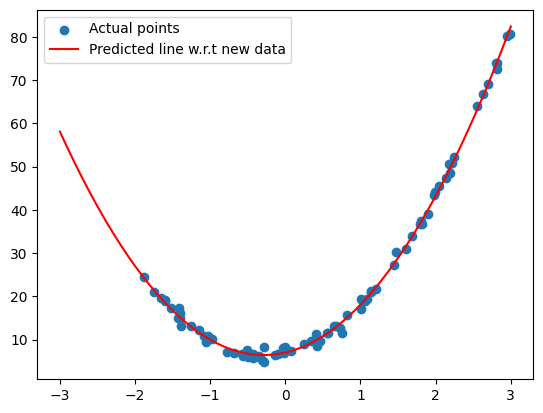

In [25]:
y_new_pred = reg.predict(x_new_poly)
plt.scatter(x_train, y_train, label='Actual points')
plt.plot(x_new, y_new_pred, c='red', label='Predicted line w.r.t new data')
plt.legend()
plt.show()

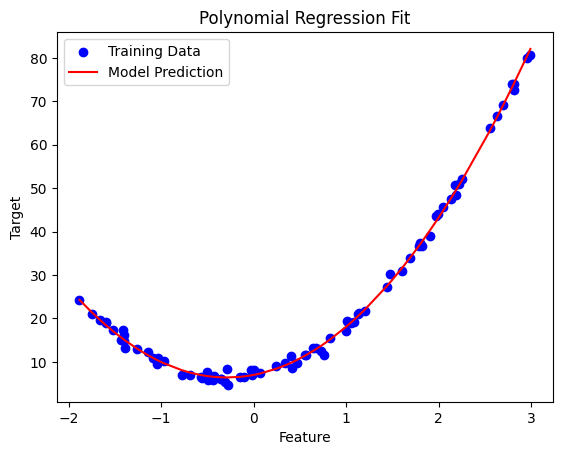

In [26]:
# Sort x_train for smooth plotting
sorted_indices = np.argsort(x_train.flatten())
x_sorted = x_train[sorted_indices]
x_poly_sorted = poly.transform(x_sorted)
y_sorted_pred = reg.predict(x_poly_sorted)

# Now plot
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_sorted, y_sorted_pred, color='red', label='Model Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title("Polynomial Regression Fit")
plt.show()


In [27]:
np.argsort([ 2.1, -1.3,  0.5,  4.2]) 
# → array([1, 2, 0, 3])


array([1, 2, 0, 3])

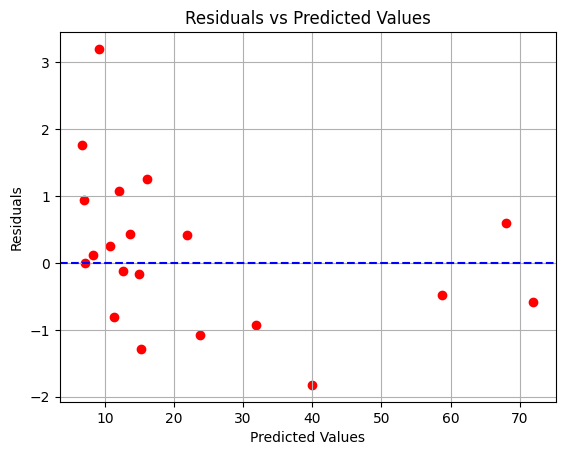

In [28]:
# Now if we want to check the residuals of the model we can do that using the following code
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Pipelines
## What is a pipeline in python
### A pipeline is a way to bundle preprocessing and modeling steps so you can treat them as a single object. This makes your code cleaner, less error-prone, and easier to reproduce.

🔧 Real-Life Analogy:
Imagine an assembly line in a factory:

Raw material goes in.

It gets cleaned (preprocessing).

Then shaped or painted (feature engineering).

Then packaged (modeling).

Final product comes out.

That’s exactly what a pipeline does in machine learning.


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('linear_reg', lin_reg)
    ])
    poly_regression.fit(x_train, y_train)
    y_pred_new = poly_regression.predict(x_new)

    # Sort x_train and y_train for smooth plotting
    sorted_idx = np.argsort(x_train.flatten())
    x_train_sorted = x_train[sorted_idx]
    y_train_sorted = y_train[sorted_idx]

    # Sort x_test and y_test as well (optional, for clearer plot)
    sorted_test_idx = np.argsort(x_test.flatten())
    x_test_sorted = x_test[sorted_test_idx]
    y_test_sorted = y_test[sorted_test_idx]

    # Plotting
    plt.plot(x_new, y_pred_new, 'r', label=f'Degree {degree}', linewidth=2)
    plt.scatter(x_train_sorted, y_train_sorted, c='y', linewidth=2, label='Training Data')
    plt.scatter(x_test_sorted, y_test_sorted, c='g', linewidth=2, label='Testing Data')
    plt.legend(loc='upper left')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.show()


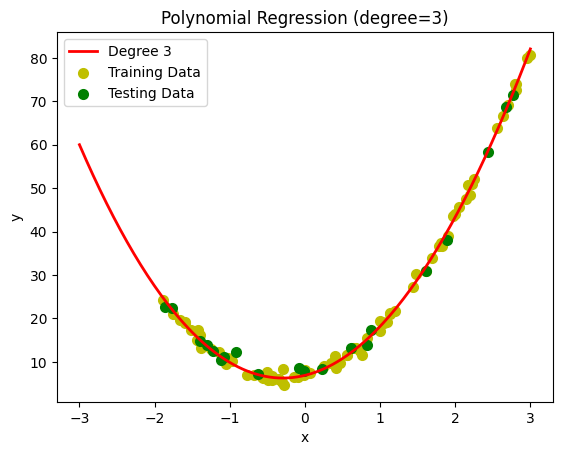

In [36]:
poly_regression(3)